In [1]:
import quickage

In [2]:
folder='/users/caganze/research/j1624/data/'
filename=folder+'/example_quickage.jpeg'

In [3]:
sourc={'ra':46.0684208, \
        'dec': -32.203782,\
        'pmra':(-25.809, 0.159),
        'pmdec':(-185.783, 0.122),
        'distance':(16.9465, 0.0356),
        'rv': (0.23, 0.08)}
metal=(0.29, 0.01)

In [4]:
res=quickage.estimate_age(sourc, metal)
res['median_age'], res['std_age']

(6.76, (1.9959999999999996, 2.6880000000000006))

No handles with labels found to put in legend.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


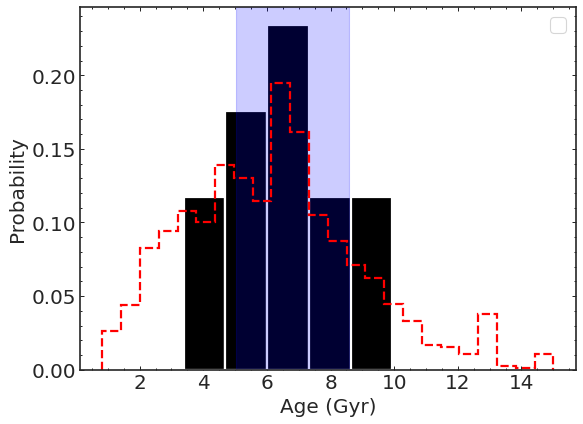

In [5]:
res=quickage.estimate_age(sourc, metal, nsigma=1, plot=True, file_plot=filename)


In [6]:
res['median_age'], res['std_age']

(6.7, (1.6560000000000006, 1.8720000000000008))

In [ ]:
res=quickage.estimate_age(sourc, metal, use_jz=True, nsigma=1, plot=True, file_plot=filename)

IsochronePotential
(834, 1434)


  0%|                                                | 0/1434 [00:00<?, ?it/s]/users/caganze/research/quickage/quickage/core.py:121: GalaDeprecationWarning: The find_actions function is deprecated and may be removed in a future version.
        Use find_actions_o2gf instead.
  result = [gd.find_actions(orbit[:,idx], N_max=10, toy_potential=toy_potential) \
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [-2  2  2]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [3 4 0]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=7.32481e-24): r

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.17545e-23): result may not be accurate.
  angles = np.array(solve(A, b))
  1%|▍                                      | 17/1434 [00:05<07:41,  3.07it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.73222e-25): result may not be accurate.
  angles = np.array(solve(A, b))
  1%|▌                                      | 20/1434 [00:06<08:13,  2.87it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [-5 -4  2]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration win

  4%|█▍                                     | 51/1434 [00:17<08:01,  2.87it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.23703e-21): result may not be accurate.
  angles = np.array(solve(A, b))
  4%|█▍                                     | 54/1434 [00:18<07:52,  2.92it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [-5  0  4]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.30203e-20): result may not be accurate.
  angles = np.array(solve(A, b))
  4%|█▍                                     | 55/1434 [00:18<07:59,  2.88it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/a

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.88574e-24): result may not be accurate.
  angles = np.array(solve(A, b))
  6%|██▎                                    | 83/1434 [00:28<07:23,  3.05it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.42958e-22): result may not be accurate.
  angles = np.array(solve(A, b))
  6%|██▎                                    | 86/1434 [00:29<07:27,  3.01it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=8.21492e-19): result may not be accurate.
  angles = np.array(solve(A, b))
  6%|██▌                                    | 92/1434 [00:31<07:17,  3.06it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle

/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.56489e-25): result may not be accurate.
  angles = np.array(solve(A, b))
 10%|███▊                                  | 145/1434 [00:48<06:54,  3.11it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.90764e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 10%|███▉                                  | 147/1434 [00:49<06:59,  3.07it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.53539e-24): result may not be accurate.
  angles = np.array(solve(A, b))
 10%|███▉                                  | 150/1434 [00:50<07:10,  2.98it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle

 13%|█████                                 | 190/1434 [01:04<07:09,  2.90it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=8.7882e-19): result may not be accurate.
  angles = np.array(solve(A, b))
 13%|█████                                 | 193/1434 [01:05<07:10,  2.89it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.70207e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 14%|█████▏                                | 195/1434 [01:05<06:57,  2.97it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.1821e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 14%|█████▏                                | 197/1434 [01:06<06:46,  3.04it/s]/Users

 17%|██████▍                               | 245/1434 [01:22<06:30,  3.04it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.04771e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 18%|██████▊                               | 256/1434 [01:26<06:47,  2.89it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=8.71198e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 18%|██████▊                               | 257/1434 [01:27<06:50,  2.87it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.07551e-19): result may not be accurate.
  angles = np.array(solve(A, b))
 18%|██████▉                               | 263/1434 [01:29<06:44,  2.89it/s]/Use

 26%|█████████▋                            | 367/1434 [02:04<06:27,  2.75it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.71115e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 26%|█████████▊                            | 368/1434 [02:05<06:28,  2.74it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.89408e-20): result may not be accurate.
  angles = np.array(solve(A, b))
 26%|█████████▊                            | 372/1434 [02:06<06:15,  2.83it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=9.52945e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 26%|█████████▉                            | 377/1434 [02:08<06:08,  2.87it/s]/Use

 30%|███████████▌                          | 435/1434 [02:28<06:55,  2.40it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=9.58106e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 30%|███████████▌                          | 436/1434 [02:29<06:43,  2.48it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.06873e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 31%|███████████▋                          | 439/1434 [02:30<05:47,  2.87it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.3989e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 31%|███████████▋                          | 440/1434 [02:30<05:42,  2.90it/s]/User

 36%|█████████████▊                        | 522/1434 [02:58<05:19,  2.85it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.52719e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 37%|█████████████▉                        | 524/1434 [02:58<05:15,  2.89it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.76451e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 37%|██████████████                        | 529/1434 [03:00<05:14,  2.87it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=8.57407e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 37%|██████████████▏                       | 535/1434 [03:02<05:16,  2.84it/s]/Use

 41%|███████████████▋                      | 591/1434 [03:22<05:02,  2.79it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=9.88339e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 41%|███████████████▋                      | 592/1434 [03:22<05:06,  2.75it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.72377e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 41%|███████████████▊                      | 595/1434 [03:23<05:02,  2.77it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [-2  6  6]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/a

 47%|██████████████████                    | 681/1434 [03:57<04:16,  2.93it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.83401e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 48%|██████████████████                    | 682/1434 [03:57<04:16,  2.93it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.92661e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 48%|██████████████████▏                   | 687/1434 [03:59<04:36,  2.70it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.60046e-20): result may not be accurate.
  angles = np.array(solve(A, b))
 48%|██████████████████▎                   | 691/1434 [04:00<04:18,  2.88it/s]/Use

 53%|████████████████████▏                 | 762/1434 [04:24<03:55,  2.86it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.3274e-24): result may not be accurate.
  angles = np.array(solve(A, b))
 53%|████████████████████▎                 | 766/1434 [04:26<03:50,  2.90it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.1224e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 53%|████████████████████▎                 | 767/1434 [04:26<03:53,  2.86it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.44574e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 54%|████████████████████▍                 | 769/1434 [04:27<03:49,  2.90it/s]/Users

 57%|█████████████████████▊                | 821/1434 [04:45<03:29,  2.92it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.06904e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 57%|█████████████████████▊                | 824/1434 [04:46<03:23,  3.00it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.30545e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 58%|█████████████████████▊                | 825/1434 [04:46<03:23,  3.00it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.83089e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 58%|█████████████████████▉                | 826/1434 [04:47<03:18,  3.06it/s]/Use

 63%|███████████████████████▊              | 899/1434 [05:12<03:02,  2.93it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.10722e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 63%|███████████████████████▊              | 900/1434 [05:12<02:56,  3.02it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.3921e-19): result may not be accurate.
  angles = np.array(solve(A, b))
 63%|███████████████████████▉              | 902/1434 [05:13<03:00,  2.95it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=9.26334e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 63%|████████████████████████              | 907/1434 [05:14<02:51,  3.08it/s]/User

 67%|█████████████████████████▌            | 967/1434 [05:35<02:47,  2.79it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.16932e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 68%|█████████████████████████▉            | 981/1434 [05:40<02:33,  2.95it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.9758e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 69%|██████████████████████████            | 984/1434 [05:41<02:27,  3.05it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=9.11594e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 69%|██████████████████████████            | 985/1434 [05:41<02:26,  3.06it/s]/User

 73%|███████████████████████████▏         | 1052/1434 [06:04<02:10,  2.93it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=4.67115e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 74%|███████████████████████████▏         | 1054/1434 [06:05<02:04,  3.04it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.35305e-18): result may not be accurate.
  angles = np.array(solve(A, b))
 74%|███████████████████████████▏         | 1056/1434 [06:06<02:02,  3.07it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.47429e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 74%|███████████████████████████▎         | 1059/1434 [06:07<01:57,  3.20it/s]/Use

 81%|█████████████████████████████▊       | 1157/1434 [06:39<01:29,  3.10it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.6216e-24): result may not be accurate.
  angles = np.array(solve(A, b))
 81%|█████████████████████████████▉       | 1160/1434 [06:40<01:28,  3.09it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.37059e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 81%|█████████████████████████████▉       | 1161/1434 [06:41<01:27,  3.12it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=1.90415e-24): result may not be accurate.
  angles = np.array(solve(A, b))
 82%|██████████████████████████████▎      | 1173/1434 [06:45<01:25,  3.05it/s]/User

 87%|████████████████████████████████     | 1242/1434 [07:08<01:04,  2.98it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.13789e-19): result may not be accurate.
  angles = np.array(solve(A, b))
 87%|████████████████████████████████▎    | 1250/1434 [07:11<01:02,  2.96it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=3.11018e-20): result may not be accurate.
  angles = np.array(solve(A, b))
 87%|████████████████████████████████▎    | 1254/1434 [07:12<01:01,  2.93it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=6.54142e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 88%|████████████████████████████████▍    | 1259/1434 [07:14<00:57,  3.03it/s]/Use

 94%|██████████████████████████████████▊  | 1347/1434 [07:44<00:29,  2.94it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=2.57543e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 95%|███████████████████████████████████  | 1360/1434 [07:48<00:26,  2.78it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=8.31015e-21): result may not be accurate.
  angles = np.array(solve(A, b))
 96%|███████████████████████████████████▎ | 1371/1434 [07:52<00:21,  2.92it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Ill-conditioned matrix (rcond=5.22365e-17): result may not be accurate.
  angles = np.array(solve(A, b))
 96%|███████████████████████████████████▍ | 1372/1434 [07:52<00:20,  2.97it/s]/Use

IsochronePotential
(834, 1000)


  0%|                                                | 0/1000 [00:00<?, ?it/s]/users/caganze/research/quickage/quickage/core.py:121: GalaDeprecationWarning: The find_actions function is deprecated and may be removed in a future version.
        Use find_actions_o2gf instead.
  result = [gd.find_actions(orbit[:,idx], N_max=10, toy_potential=toy_potential) \
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:281: UserWarning: Need a longer integration window for mode [-6  2  4]
  warnings.warn("Need a longer integration window for mode {0}"
/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:544: UserWarning: More unknowns than equations!
  warnings.warn("More unknowns than equations!")
 21%|████████                              | 212/1000 [01:12<04:39,  2.82it/s]/Users/caganze/opt/anaconda3/lib/python3.9/site-packages/gala/dynamics/actionangle/actionangle_o2gf.py:537: LinAlgWarning: Il

In [ ]:
#check for these properties
#FeH = -0.38±0.07
#RV = +15±6 km/s (no Keck, could get with NIRSPEC)
#Gaia EDR: 
#π = 17.985±0.041 mas
#µra = 226.011±0.052 mas/yr
#µdec = -336.242±0.035 mas/yr

import astropy.coordinates as astro_coord
import astrop.units as u

c = astro_coord.SkyCoord('00:35:13.45 -03:22:19.50', unit=(u.hourangle, u.deg))


In [ ]:
sourc={'ra':c.ra.to(u.degree).value, \
        'dec': c.dec.to(u.degree).value,\
        'pmra':(-25.809, 0.159),
        'pmdec':(-185.783, 0.122),
        'distance':(16.9465, 0.0356),
        'rv': (15, 6)}
metal=(-0.,39, 0.07)